Tarefa 1: 
---------
* Implementar um classificador linear (apenas o passo de predição). 
* Usar os pesos carregados para efetuar a classificação do conjunto de teste. 
* Gerar pesos aleatórios (para W e b) e comparar os resultados.
* Recomendável I: implementar ambos esquemas de predição: 1) X = (A, N); e 2) X = (N, A). Onde A é o número de atributos (pixels) e N é o número de instâncias (imagens). 
* Recomendável II: implemente o k-NN com distâncias L1 (manhattan) e L2 (euclidiana) e compare os resultados. 

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Carregando o dataset de dígitos. Pode ser que demore um pouco, pois a rotina load_digits baixa os dados quando necessário. São 1797 imagens preto e branco com 8 x 8 pixels. 

In [2]:
# 1797 imagens em grayscale 8 x 8 = 64 pixels
# Digitos (Classes): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dataset = load_digits(n_class=10)
# Obtem as instancias (N X A)
X = dataset.data
# Obtem as classes (C)
y = dataset.target

# Divide entre treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizacao
max_ = X_treino.max()
X_treino /= max_
X_teste  /= max_

# Imprime as dimensoes das matrizes/vetores
print('X_treino:', X_treino.shape)
print('y_treino:', y_treino.shape)
print('X_teste :', X_teste.shape)
print('y_teste :', y_teste.shape)

('X_treino:', (1203, 64))
('y_treino:', (1203,))
('X_teste :', (594, 64))
('y_teste :', (594,))


Em seguida nós plotamos algumas imagens do treino para verificar se os dados foram carregados corretamente. Não se preocupe se não entender esta parte do código. 

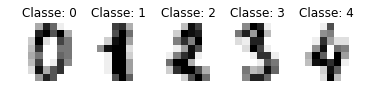

In [3]:
plt.gray() 
images_and_labels = list(zip(dataset.images, dataset.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Classe: %i' % label)

Aqui estão os pesos que você deverá usar para fazer a classificação do treino. 

In [4]:
# Carrega os pesos serializados
W, b = np.load('weights.npy', allow_pickle=True)
# Imprime as dimensões das matrizes/vetores dos pesos
print('W shape', W.shape)
print('b shape', b.shape)

('W shape', (64, 10))
('b shape', (1, 10))


1) Implemente a predição usando o classificador linear:

In [5]:
def predicao(X, W, b):
    y_predito = X.dot(W) + b
    return y_predito

In [9]:
pred = predicao(X_teste, W, b)
print('Pred shape', pred.shape)

('Pred shape', (594, 10))


2) Implemente uma medida de desempenho como acurácia ou erro de classificação (evite usar sklearn e outras bibliotecas prontas para isso). 
* Acurácia = Número de acertos / Número de imagens 
* Erro = Número de erros / Número de imagens
* Implemente outras medidas se quiser. 


In [10]:
def avaliar_resultados(y_teste, y_predito):
    y_predito = y_predito.argmax(-1)
    desempenho = ((y_teste == y_predito).mean())
    return desempenho

In [11]:
pretrained_eval = avaliar_resultados(y_teste, pred)
print('Acuracia classificador pre-treinado', pretrained_eval)

('Acuracia classificador pre-treinado', 0.9612794612794613)


3) Teste o desempenho do classificador usando pesos alatórios para a mesma tarefa de classificação e compare os resultados.

In [31]:
def inicializacao_aleatoria(W, b):
    # Seu código aqui
    return W, b

In [33]:
rand_W, rand_b = inicializacao_aleatoria(W, b)
pred_rand = predicao(X_teste, rand_W, rand_b)
random_eval = avaliar_resultados(y_teste, pred_rand)
print('Acurácia Classificador Aleatorio: ', random_eval)

((64, 10), (1, 10))
('Acur\xc3\xa1cia Classificador Aleatorio: ', 0.12289562289562289)
